In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 13 kB/s 
     |████████████████████████████████| 47.6 MB 151 kB/s 


In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

In [ ]:
def recognize_text(img_path):
  reader=easyocr.Reader(['en'])
  return reader.readtext(img_path)

In [ ]:
from io import BytesIO
uploaded = files.upload()


Saving 2070691324b.tif to 2070691324b.tif


In [ ]:
from PIL import Image

In [ ]:
im = Image.open(BytesIO(uploaded['2070691324b.tif']))

In [ ]:
im.save('test.jpg')

In [ ]:
import cv2
from matplotlib import pyplot as plt
image_file = "test.jpg"
img = cv2.imread(image_file)

In [ ]:
def display(im_path):
    dpi = 90
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

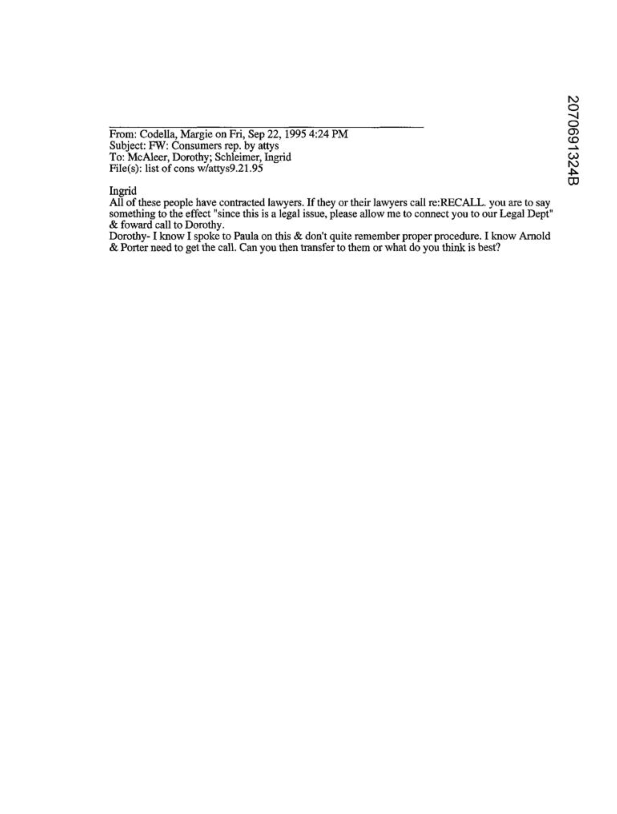

In [ ]:
display('test.jpg')

In [ ]:
def inverting(img):
  inverted_image = cv2.bitwise_not(img)
  plt.imsave('inverted.jpg', inverted_image)

def threshold(img):
  thresh, im_bw = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
  plt.imsave("bw_image.jpg", im_bw) 

def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

def noise(im_bw):
  no_noise = noise_removal(im_bw)
  plt.imsave("no_noise.jpg", no_noise)

def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

def thick(no_noise):
  dilated_image = thick_font(no_noise)
  plt.imsave("dilated_image.jpg", dilated_image) 


def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

def no_border():
  no_borders = remove_borders(no_noise)
  plt.imsave("no_borders.jpg", no_borders)
  


In [ ]:
inverting(img)

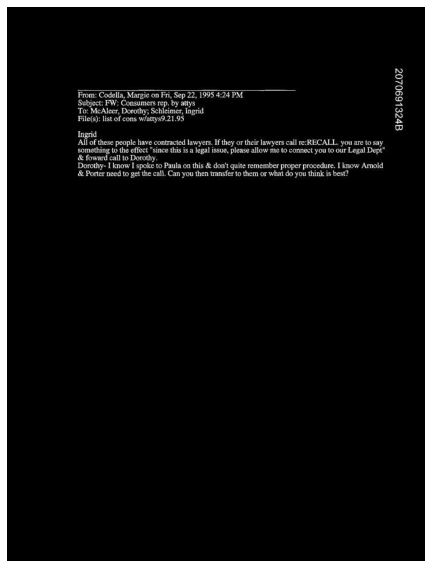

In [ ]:
display("inverted.jpg")


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,332 kB/s)
debconf: unable to initi

In [ ]:
import pytesseract
from PIL import Image

In [ ]:
ocr_result=pytesseract.image_to_string(Image.open(image_file))

In [ ]:
print(ocr_result)

From: Codella, Margie on Fri, Sep 22, 1995 4:24 PM
‘Subject: FW: Consumers rep. by attys

To: McAleer, Dorothy; Schleimer, Ingrid

File(s): list of cons w/attys9.21.95

Ingrid

Allof these people have contracted lawyers. Ifthey or their lawyers call re:RECALL. you are to say
something to the effect "since this is a legal issue, please allow me to connect you to our Legal Dept”
& foward call to Dorothy.

Dorothy- know I spoke to Paula on this & don't quite remember proper procedure. I know Amold
& Porter need to get the call. Can you then transfer to them or what do you think is best?

arZe1690207



In [ ]:
from io import BytesIO
uploaded = files.upload()

Saving 1000215379.tif to 1000215379.tif


In [ ]:
im = Image.open(BytesIO(uploaded['1000215379.tif']))
im.save('test1.jpg')

In [ ]:

image_file = "test1.jpg"
img = cv2.imread(image_file,1)

In [ ]:
img.shape

(1000, 777, 3)

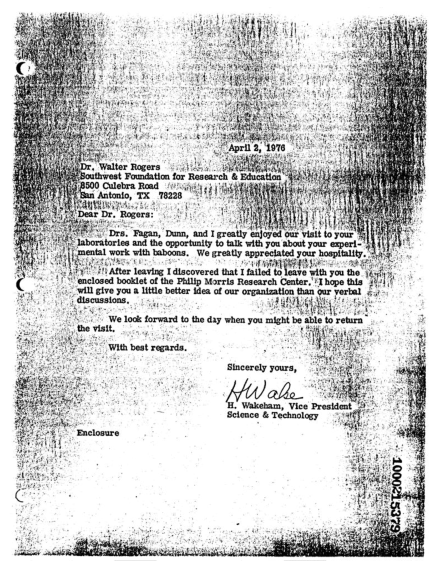

In [ ]:
display(image_file)

## **Average Blurring**

In [ ]:
blur = cv2.blur(img,(2,2))

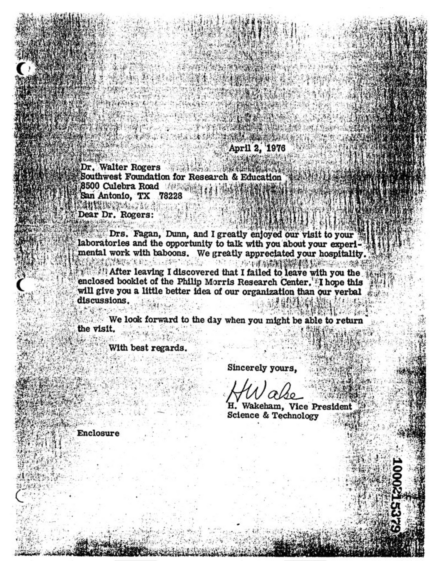

In [ ]:
plt.imsave("blur_image.png",blur)
display("blur_image.png")

In [ ]:
ret3, th1 = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)

In [ ]:
plt.imsave("bw_image.jpg", th1)

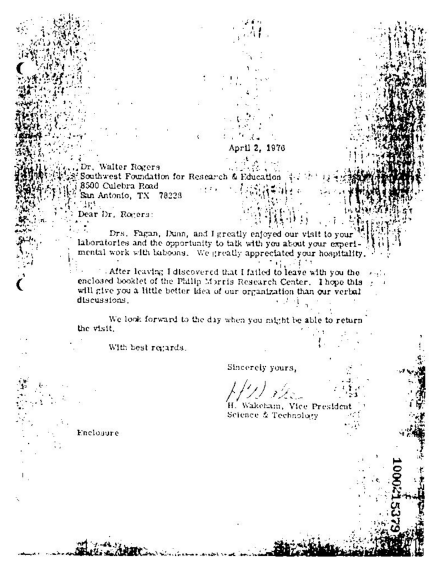

In [ ]:
display("bw_image.jpg")

In [ ]:
ocr_result=pytesseract.image_to_string(th1)
print(ocr_result)

   

 

   
 
     
     
     
 

999 Culebra Road
San Antonio, TX 78228
it

Dear Dr. Rogers:

Drs, Fagan, Dunn, and I greatly en}

 

 

mental work vith Labooay, We greatly appreciated your hospttality.
1 discovered that I failed to leave with you the

- After leaving :
Sorris Research Center, [hope this :. 1

   

 

 

C enclosed Looslet of the PRIMa 5
will rive you a Little better idea of our oryantzation than our verbal
discussions, Td

We look forward ta the day when you might be able to retura”
the visit,

     
  
     
   

With beat rogarda ‘

Stacercly yours,

    

H. Waheha Vice President
Sconce & Teehnolury L

 

Enclosure

 



## **Gaussian** **Filter**

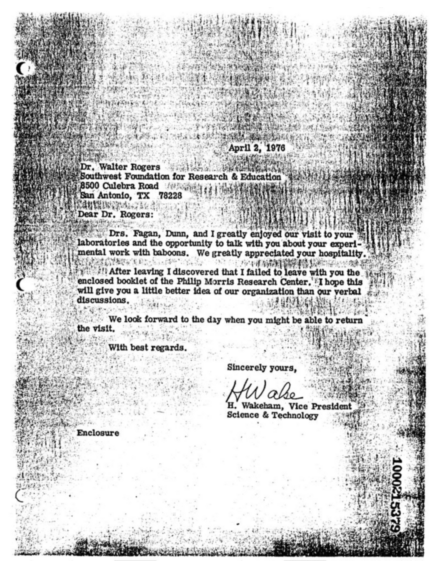

In [ ]:
blur_gaussian = cv2.GaussianBlur(img, (3, 3), 0)
plt.imsave("blur_image.png",blur_gaussian)
display("blur_image.png")

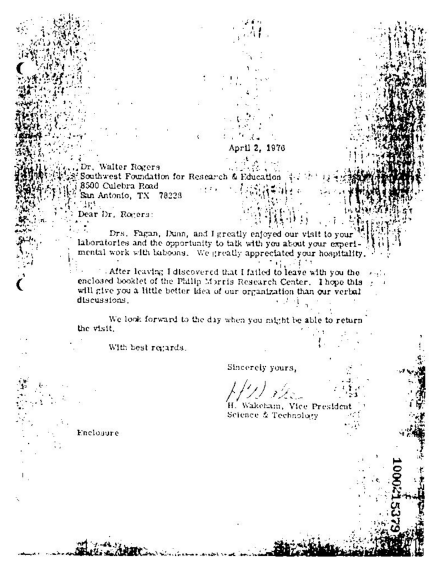

In [ ]:
ret3_gaussian, th1_gaussian = cv2.threshold(blur_gaussian, 70, 255, cv2.THRESH_BINARY)
plt.imsave("bw_image.jpg", th1_gaussian)
display("bw_image.jpg")

In [ ]:
ocr_result=pytesseract.image_to_string(th1_gaussian)
print(ocr_result)

  
   
   
 
   
 
  

 

Dr, Walter Rogers
oithuest Foundation for Research & Education +s“?
8500 Culebra Rord :

‘San Antonio, TX 78228
“tnt

* Dear Dr, Rovers

     

Fagan, Dunn, and I greatly eajoyed our vislt to your“ a
laboratories and the opportunity to tatk with you about your experi Yi! ho
mental work with laboons, We ureatly apprectated your hospitality. =;

. od
Alter leaving discovered that [failed to leave with you the
enclosed booklet of the Plillp Morris Research Center. Thopo this
will rive you a little better Idea of our organization than our verbal

discussions, hy

 

   

We look forward to the day when you milsht be able to return”
the visit.

With best rezards,

    

    

» Vice President
Selence & Technol

    

Enclogure



In [ ]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

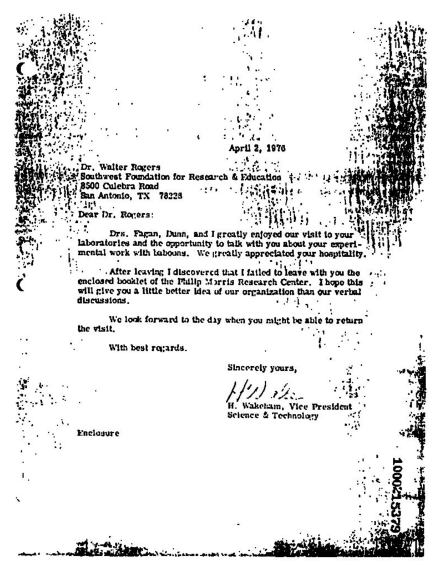

In [ ]:
dilated_image = thick_font(th1_gaussian)
plt.imsave("thick_image.jpg",dilated_image)
display("thick_image.jpg")

In [ ]:
ocr_result=pytesseract.image_to_string(dilated_image)
print(ocr_result)

    
   
 
 
   

      

. Walter Rogers
jouthwest Foundation for Research & Fducatl
500 Culebra Road

‘Ban Antonio, TX 78228
Lane

Dear Dr, Royers:

 

. Dra. Fagan, Dunn, and I groatly enjoyed our vialt ie your"
~ “ laboratories and the opportunity to tatk with you akout your experi-
j._meneal work with Labouns. We really appreciated your hospitality.

 

 

- After leaving I discovercd that [ fatled tile with you Ge
enclosed bocklet of the Phillp Morris Reaearch Center. Thope this

‘will give you a little better Idea uf our organization pan our verbal
discussions,

 

ta

We look forward to the day whea you mizht be able to return”
the visit,

 

With best royards.

Slacerely yours,

TA) »

H. Waketam, Vice President ‘+
| Selence & Technolozy

Enclosure

  

    

 

